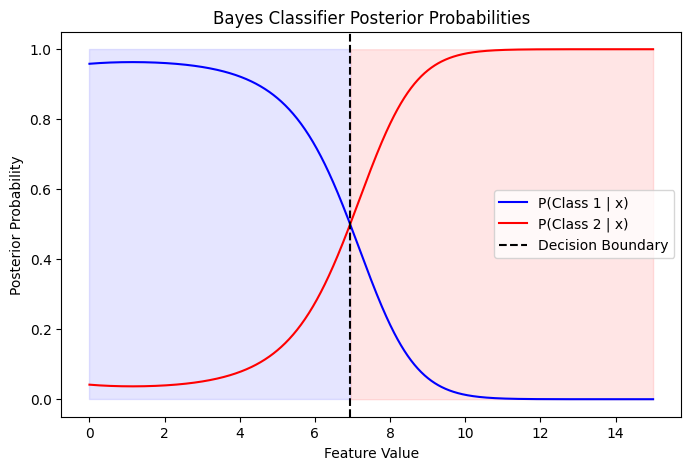

Decision boundary occurs at x = 6.94
Shaded regions indicate class decision regions: Blue for Class 1 and Red for Class 2.
Analysis: The decision boundary is the point where the posterior probabilities of both classes are equal. A slight shift in the decision boundary could lead to a change in classification results. If more weight is given to one class (may be by modifying priors), the boundary will shift accordingly.


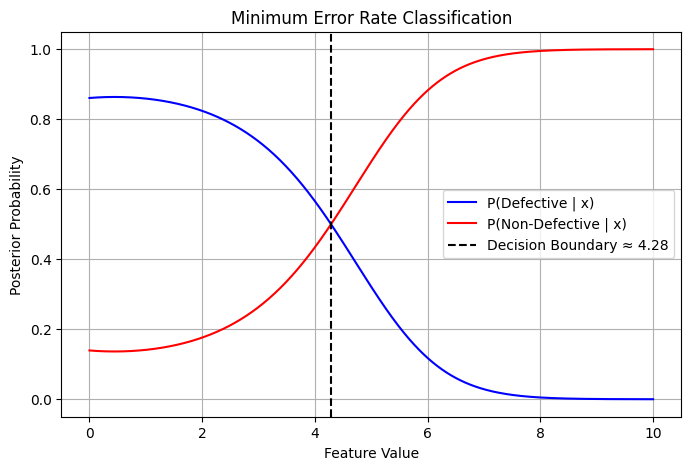

If the decision boundary is shifted slightly, the misclassification rate changes. A shift towards one class increases false positives for the other, affecting overall classification accuracy.


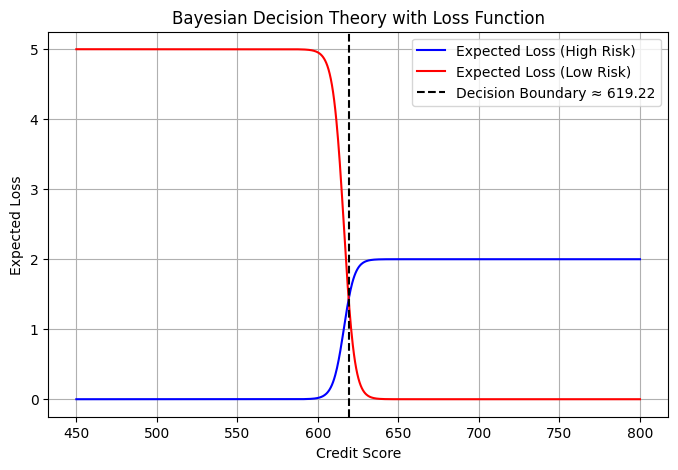

If the prior probability of high-risk applicants increases, the decision boundary shifts, classifying more applicants as high-risk. This reflects a stricter loan approval policy.


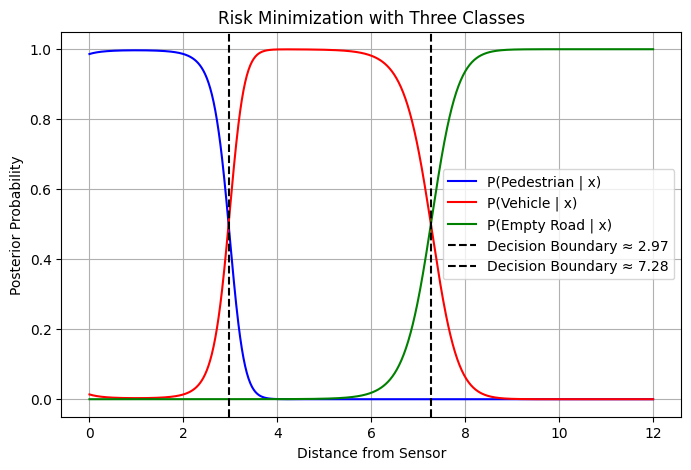

Increasing the penalty for misclassifying a pedestrian makes the classifier more conservative. The decision regions will shift to minimize pedestrian misclassification, likely classifying more uncertain cases as pedestrians.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Question 1: Bayes Classifier
def bayes_classifier():
    feature_values = np.linspace(0, 15, 1000)

    # Given prior probabilities and Gaussian distribution parameters
    prior_class1, prior_class2 = 0.6, 0.4
    mean_class1, std_class1 = 5, 1.5
    mean_class2, std_class2 = 8, 2.0

    # Compute class-conditional probability densities
    likelihood_class1 = norm.pdf(feature_values, mean_class1, std_class1)
    likelihood_class2 = norm.pdf(feature_values, mean_class2, std_class2)

    # Compute posterior probabilities using Bayes' Theorem
    total_probability = likelihood_class1 * prior_class1 + likelihood_class2 * prior_class2
    posterior_class1 = (likelihood_class1 * prior_class1) / total_probability
    posterior_class2 = (likelihood_class2 * prior_class2) / total_probability

    # Plot posterior probabilities
    plt.figure(figsize=(8, 5))
    plt.plot(feature_values, posterior_class1, label='P(Class 1 | x)', color='blue')
    plt.plot(feature_values, posterior_class2, label='P(Class 2 | x)', color='red')

    # Find and mark decision boundary
    decision_boundary = feature_values[np.abs(posterior_class1 - posterior_class2).argmin()]
    plt.axvline(decision_boundary, color='black', linestyle='dashed', label='Decision Boundary')

    # Shade decision regions
    plt.fill_between(feature_values, 0, 1, where=posterior_class1 > posterior_class2, color='blue', alpha=0.1)
    plt.fill_between(feature_values, 0, 1, where=posterior_class2 > posterior_class1, color='red', alpha=0.1)

    plt.legend()
    plt.xlabel('Feature Value')
    plt.ylabel('Posterior Probability')
    plt.title('Bayes Classifier Posterior Probabilities')
    plt.show()

    print(f"Decision boundary occurs at x = {decision_boundary:.2f}")
    print("Shaded regions indicate class decision regions: Blue for Class 1 and Red for Class 2.")

    # Task 5:
    print("Analysis: The decision boundary is the point where the posterior probabilities of both classes are equal. A slight shift in the decision boundary could lead to a change in classification results. If more weight is given to one class (may be by modifying priors), the boundary will shift accordingly.")





# 2. Minimum Error Rate Classification :

def minimum_error_rate_classification():
    """Implements a minim. error rate classifier - Bayesian decision theory."""
    feature_values = np.linspace(0, 10, 1000)


    # Prior probability
    prior_defective = 0.3
    prior_non_defective = 0.7

    # Gaussian dist.
    mean_defective, std_defective = 4, 1.2
    mean_non_defective, std_non_defective = 6, 1.5

    #  likelihoods
    likelihood_defective = norm.pdf(feature_values, mean_defective, std_defective)
    likelihood_non_defective = norm.pdf(feature_values, mean_non_defective, std_non_defective)

    #  posteriors
    total_prob = (likelihood_defective * prior_defective) + (likelihood_non_defective * prior_non_defective)
    posterior_defective = (likelihood_defective * prior_defective) / total_prob
    posterior_non_defective = (likelihood_non_defective * prior_non_defective) / total_prob



    # Decision boundary
    decision_boundary = feature_values[np.argmin(np.abs(posterior_defective - posterior_non_defective))]


    # Plot results
    plt.figure(figsize=(8, 5))
    plt.plot(feature_values, posterior_defective, label="P(Defective | x)", color="blue")
    plt.plot(feature_values, posterior_non_defective, label="P(Non-Defective | x)", color="red")
    plt.axvline(decision_boundary, color="black", linestyle="dashed", label=f"Decision Boundary ≈ {decision_boundary:.2f}")

    plt.xlabel("Feature Value")
    plt.ylabel("Posterior Probability")
    plt.title("Minimum Error Rate Classification")
    plt.legend()
    plt.grid(True)
    plt.show()
  # Task 5:
    print("If the decision boundary is shifted slightly, the misclassification rate changes. A shift towards one class increases false positives for the other, affecting overall classification accuracy.")


# 3. Bayesian Decision Theory with Loss Function :

def bayesian_decision_loss():
    """Implements a decision-making system with a loss function to minimize risk."""
    credit_scores = np.linspace(450, 800, 1000)

    # Prior probabilities
    prior_high_risk = 0.4
    prior_low_risk = 0.6

    # Gaussian distributions
    mean_high_risk, std_high_risk = 550, 20
    mean_low_risk, std_low_risk = 700, 25

    #  likelihoods
    likelihood_high_risk = norm.pdf(credit_scores, mean_high_risk, std_high_risk)
    likelihood_low_risk = norm.pdf(credit_scores, mean_low_risk, std_low_risk)

    #  posteriors
    total_prob = (likelihood_high_risk * prior_high_risk) + (likelihood_low_risk * prior_low_risk)
    posterior_high_risk = (likelihood_high_risk * prior_high_risk) / total_prob
    posterior_low_risk = (likelihood_low_risk * prior_low_risk) / total_prob

    # Define loss function
    expected_loss_high = 0 * posterior_high_risk + 2 * posterior_low_risk
    expected_loss_low = 5 * posterior_high_risk + 0 * posterior_low_risk

    # Decision boundary (minimum risk point)
    decision_boundary = credit_scores[np.argmin(np.abs(expected_loss_high - expected_loss_low))]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(credit_scores, expected_loss_high, label="Expected Loss (High Risk)", color="blue")
    plt.plot(credit_scores, expected_loss_low, label="Expected Loss (Low Risk)", color="red")
    plt.axvline(decision_boundary, color="black", linestyle="dashed", label=f"Decision Boundary ≈ {decision_boundary:.2f}")

    plt.xlabel("Credit Score")
    plt.ylabel("Expected Loss")
    plt.title("Bayesian Decision Theory with Loss Function")
    plt.legend()
    plt.grid(True)
    plt.show()
    print("If the prior probability of high-risk applicants increases, the decision boundary shifts, classifying more applicants as high-risk. This reflects a stricter loan approval policy.")


# 4. Risk Minimization with Three Classes:

def risk_minimization_three_classes():
    """Implements a Bayesian decision model for minimizing risk across three classes."""
    distances = np.linspace(0, 12, 1000)

    # Prior probability for each class
    prior_pedestrian = 0.2
    prior_vehicle = 0.5
    prior_empty = 0.3

    # Gaussian distribution parameters (mean and standard deviation)
    mean_pedestrian, std_pedestrian = 2, 0.5
    mean_vehicle, std_vehicle = 5, 1.0
    mean_empty, std_empty = 10, 1.5

    #  likelihoods (P(x | w))
    likelihood_pedestrian = norm.pdf(distances, mean_pedestrian, std_pedestrian)
    likelihood_vehicle = norm.pdf(distances, mean_vehicle, std_vehicle)
    likelihood_empty = norm.pdf(distances, mean_empty, std_empty)

    #  posteriors
    total_prob = (
        likelihood_pedestrian * prior_pedestrian +
        likelihood_vehicle * prior_vehicle +
        likelihood_empty * prior_empty
    )

    posterior_pedestrian = (likelihood_pedestrian * prior_pedestrian) / total_prob
    posterior_vehicle = (likelihood_vehicle * prior_vehicle) / total_prob
    posterior_empty = (likelihood_empty * prior_empty) / total_prob

    # Decision boundaries - find where the highest posterior class changes
    decision_boundaries = []
    for i in range(1, len(distances)):
        prev_class = np.argmax([posterior_pedestrian[i-1], posterior_vehicle[i-1], posterior_empty[i-1]])
        curr_class = np.argmax([posterior_pedestrian[i], posterior_vehicle[i], posterior_empty[i]])
        if prev_class != curr_class:
            decision_boundaries.append(distances[i])

    # Plot the posterior probability
    plt.figure(figsize=(8, 5))
    plt.plot(distances, posterior_pedestrian, label="P(Pedestrian | x)", color="blue")
    plt.plot(distances, posterior_vehicle, label="P(Vehicle | x)", color="red")
    plt.plot(distances, posterior_empty, label="P(Empty Road | x)", color="green")

    # Mark decision boundaries on the plot
    for boundary in decision_boundaries:
        plt.axvline(boundary, color="black", linestyle="dashed", label=f"Decision Boundary ≈ {boundary:.2f}")

    plt.xlabel("Distance from Sensor")
    plt.ylabel("Posterior Probability")
    plt.title("Risk Minimization with Three Classes")
    plt.legend()
    plt.grid(True)
    plt.show()
    print("Increasing the penalty for misclassifying a pedestrian makes the classifier more conservative. The decision regions will shift to minimize pedestrian misclassification, likely classifying more uncertain cases as pedestrians.")



if __name__ == "__main__":
    bayes_classifier()
    minimum_error_rate_classification()
    bayesian_decision_loss()
    risk_minimization_three_classes()